<a href="https://colab.research.google.com/github/arnabdas29/image-rekognition/blob/master/Histogram_Equalisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

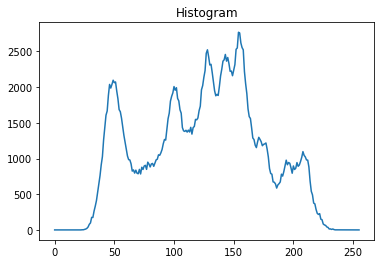

In [0]:
img = cv2.imread("Lenna.jpg",0)
cv2.imwrite("BW lenna.jpg",img)
histo = cv2.calcHist([img],[0],None,[256],[0,256])
plt.title("Histogram")
plt.plot(histo)


1.0


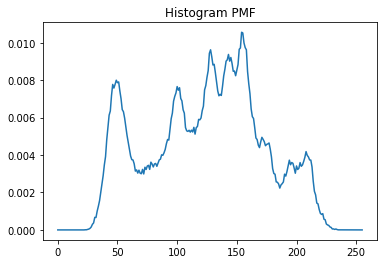

In [0]:
pix = 512*512
histo_pmf = histo/pix
plt.title("Histogram PMF")
print(np.sum(histo_pmf))
plt.plot(histo_pmf)

[1.]


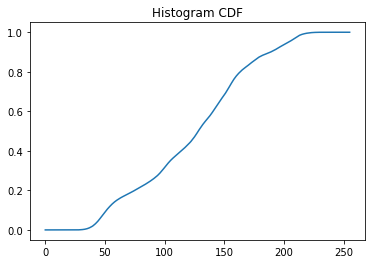

In [0]:
cdf = histo_pmf
for i in range(1,256,1):
  cdf[i] = cdf[i]+cdf[i-1]
plt.title("Histogram CDF")
plt.plot(cdf)
print(cdf[-1])

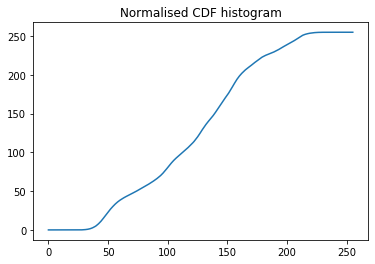

In [0]:
norm_histo_cdf = cdf*255
plt.title("Normalised CDF histogram")
plt.plot(norm_histo_cdf)

In [0]:
newimg = np.zeros(img.shape)
print(newimg.shape)
for i in range(0,img.shape[0]):
  for j in range(0,img.shape[1]):
    pix_val = img[i][j]
    newimg[i][j]=int(norm_histo_cdf[pix_val])
newimg = newimg.astype(np.uint8)
print(newimg)
cv2.imwrite("newimg.jpg",newimg)

(512, 512)
[[201 205 198 ... 210 189 127]
 [200 203 198 ... 212 189 124]
 [200 203 200 ... 217 191 124]
 ...
 [  7  11  26 ...  86  86  80]
 [ 11  14  30 ...  89  89  92]
 [ 11  14  28 ...  88  86  96]]


True

difference between the 2 histograms

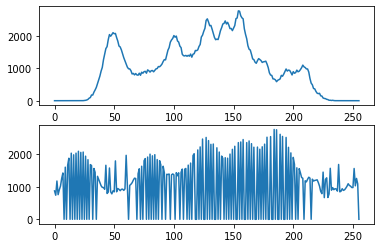

In [0]:
histo1 = cv2.calcHist([img],[0],None,[256],[0,256])
histo2 = cv2.calcHist([newimg],[0],None,[256],[0,256])
plt.subplot(211)
plt.plot(histo1)
plt.subplot(212)
plt.plot(histo2)